In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt


In [6]:
images_folder_path = 'Example Data-20240208T214429Z-001\Example Data\exported'


<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\Hussein\AppData\Local\Temp\ipykernel_7404\328789232.py:1: SyntaxWarning: invalid escape sequence '\E'
  images_folder_path = 'Example Data-20240208T214429Z-001\Example Data\exported'


In [7]:
image_files = [f for f in os.listdir(images_folder_path) if os.path.isfile(os.path.join(images_folder_path, f))]
images = [Image.open(os.path.join(images_folder_path, img)) for img in image_files]

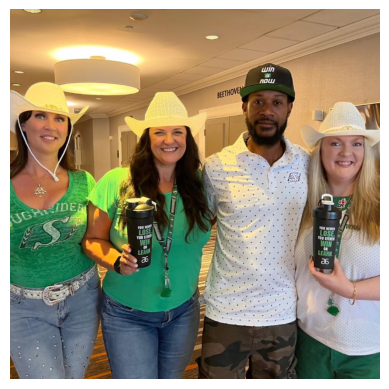

In [8]:
plt.imshow(images[9])
plt.axis('off') 
plt.show()

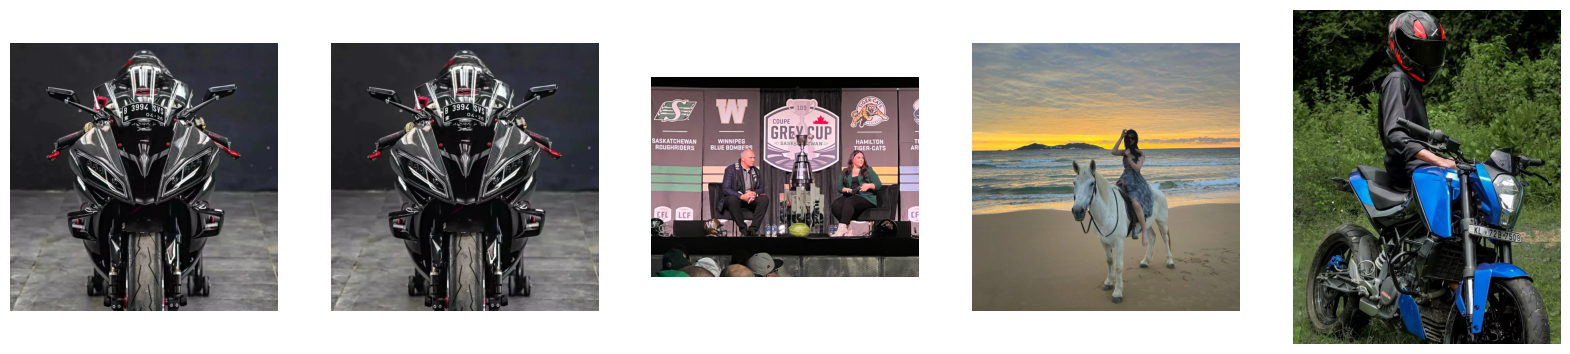

In [9]:
fig, axs = plt.subplots(1, len(images[:5]), figsize=(20, 20))  
for i, img in enumerate(images[:5]):
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()

In [10]:
import pandas as pd

In [11]:
df = pd.read_excel(r'Example Data-20240208T214429Z-001\Example Data\ImageLabels.xlsx')

In [12]:
print(df.head())


                                   Image Name          Categories   Label  \
0  (1) @GreyCupFestival - 109th Grey Cup.jpeg  Person Description   Adult   
1  (1) @GreyCupFestival - 109th Grey Cup.jpeg  Person Description  Female   
2  (1) @GreyCupFestival - 109th Grey Cup.jpeg  Person Description  Person   
3  (1) @GreyCupFestival - 109th Grey Cup.jpeg  Person Description   Woman   
4  (1) @GreyCupFestival - 109th Grey Cup.jpeg  Person Description    Male   

   Confidence Aliases                Parents  Instance Count  
0   99.835724     NaN                 Person               2  
1   99.835724     NaN                 Person               1  
2   99.835724   Human                    NaN               7  
3   99.835724     NaN  Adult, Female, Person               1  
4   99.316856     NaN                 Person               1  


In [14]:
import os
import pandas as pd
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import numpy as np


image_name_column = 'Image Name'  


# Prepare the data arrays
image_names = df[image_name_column].values
encoded_labels = LabelEncoder().fit_transform(df['Label'])  
images = []

# Load and preprocess the images
for image_name in image_names:
    image_path = os.path.join(images_folder_path, image_name)
    if os.path.exists(image_path):
        # Open the image
        with Image.open(image_path) as img:
            # Preprocess the image as required, e.g., resize
            img = img.resize((128, 128))  # Example resizing to 128x128
            img = img.convert('RGB')  # Convert to RGB if needed

            # Convert the image to a numpy array and normalize pixel values
            img_array = np.array(img) / 255.0

            # Append the image to the list
            images.append(img_array)
    else:
        print(f"Image {image_name} not found.")

# Convert images to a numpy array
images = np.array(images)

# The images and encoded_labels arrays are now ready for use in a machine learning model
print(f"Loaded {len(images)} images.")
print(f"Encoded labels: {encoded_labels[:5]}")  # Show the first 5 as an example

Image (11) 17997439897932301.webp not found.
Image (5) 18262020151093596.webp not found.
Image (7) 18006556474787720.webp not found.
Image (9) 17895815912854630.webp not found.
Loaded 398 images.
Encoded labels: [  1  57 117 168  96]


In [21]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Assuming 'images' and 'encoded_labels' are available from the previous steps

# Convert labels to categorical one-hot encoding
one_hot_labels = to_categorical(encoded_labels, num_classes=np.unique(encoded_labels).size)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=0.2, random_state=42)

# Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Save the model
model.save('my_model.h5')

ModuleNotFoundError: No module named 'distutils'